# Hepatitis Mortality Prediction with ML


#### Workflow
+ 1.Data Prep
+ 2.EDA
+ 3.Feature Selection
+ 4.Build Model
+ 5.Interpret Model
+ 6.Evaluation of Model
+ 7.Serialization
+ 8.Production with Streamlit or Flask

### 1.Data Prep

In [1]:
# Load Our EDA Pkgs
import pandas as pd 
import numpy as np

In [2]:
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns

1. Class: DIE, LIVE
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
3. SEX: male, female
4. STEROID: no, yes
5. ANTIVIRALS: no, yes
6. FATIGUE: no, yes
7. MALAISE: no, yes
8. ANOREXIA: no, yes
9. LIVER BIG: no, yes
10. LIVER FIRM: no, yes
11. SPLEEN PALPABLE: no, yes
12. SPIDERS: no, yes
13. ASCITES: no, yes
14. VARICES: no, yes
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
17. SGOT: 13, 100, 200, 300, 400, 500,
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
20. HISTOLOGY: no, yes

In [3]:
# Load Our Dataset
df = pd.read_csv("dataset/hepatitis.csv")

In [4]:
# Preview the first datapoint
df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,0,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,0,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,0,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [5]:
col_names = ["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"]

In [6]:
# df = pd.read_csv("data/hepatitis.data",names=col_names)

In [7]:
df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,0,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,0,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,0,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [8]:
# Clean our Column Names
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [9]:
# Convert ot lowercase
df.columns.str.lower().str.replace(' ','_')

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [10]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [11]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [12]:
# Data Types
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palpable      int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [13]:
# Replace ? with 0
# df['protime'] = df.replace('?','null')


In [14]:
df['protime'] = df['protime'].replace(0,df['protime'].mean())
df['bilirubin'] = df['bilirubin'].replace(0,df['bilirubin'].mean())
df['sgot'] = df['sgot'].replace(0,df['sgot'].mean())
df['alk_phosphate'] = df['alk_phosphate'].replace(0,df['alk_phosphate'].mean())
df['albumin'] = df['albumin'].replace(0,df['albumin'].mean())
df['age'] = df['age'].replace(0,df['age'].mean())
# df['protime'].mean()

In [15]:
df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.000000,18.0,4.0,35.116129,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.000000,42.0,3.5,35.116129,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.000000,32.0,4.0,35.116129,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46.000000,52.0,4.0,80.000000,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85.619355,200.0,4.0,35.116129,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,85.619355,242.0,3.3,50.000000,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126.000000,142.0,4.3,35.116129,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75.000000,20.0,4.1,35.116129,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81.000000,19.0,4.1,48.000000,2


In [16]:
# df['protime'].fillna(value=df['protime'].mean(), inplace=True)

In [17]:
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palpable      int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology            int64
dtype: object

In [18]:
# How many columns with object
sum(df.dtypes == 'object')

0

In [19]:
df.columns[df.dtypes == 'object']

Index([], dtype='object')

In [20]:
# Casting
# Convert from one dt to another
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 
       'alk_phosphate', 'sgot', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']].astype(int)

In [21]:
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int32
antivirals           int64
fatigue              int32
malaise              int32
anorexia             int32
liver_big            int32
liver_firm           int32
spleen_palpable      int32
spiders              int32
ascites              int32
varices              int32
bilirubin          float64
alk_phosphate        int32
sgot                 int32
albumin            float64
protime              int32
histology            int64
dtype: object

In [22]:
df[['bilirubin','albumin']] = df[['bilirubin','albumin']].astype(float)

In [23]:
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int32
antivirals           int64
fatigue              int32
malaise              int32
anorexia             int32
liver_big            int32
liver_firm           int32
spleen_palpable      int32
spiders              int32
ascites              int32
varices              int32
bilirubin          float64
alk_phosphate        int32
sgot                 int32
albumin            float64
protime              int32
histology            int64
dtype: object

#### Narative
+ Most of the data were in objects
+ Two of them were in float

In [24]:
### Count of each row
df.count()

class              155
age                155
sex                155
steroid            155
antivirals         155
fatigue            155
malaise            155
anorexia           155
liver_big          155
liver_firm         155
spleen_palpable    155
spiders            155
ascites            155
varices            155
bilirubin          155
alk_phosphate      155
sgot               155
albumin            155
protime            155
histology          155
dtype: int64

In [25]:
# Shape of dataset
df.shape

(155, 20)

In [26]:
### Missing Values
df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

### 2.EDA
+ Descriptive analytics

In [27]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.425378,101.522581,85.819355,3.776591,50.470968,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.188349,47.082042,88.480130,0.628368,21.419226,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,26.000000,14.000000,2.100000,21.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.800000,78.000000,32.500000,3.423226,35.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,85.000000,59.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [28]:
target_label = {"Die":1,"Live":2}

In [29]:
# Value counts
df['class'].value_counts()

2    123
1     32
Name: class, dtype: int64

<AxesSubplot:>

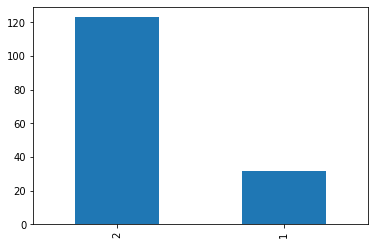

In [30]:
# Plot of Count
df['class'].value_counts().plot(kind='bar')

In [31]:
### How many are males(1) and females(2)
df['sex'].unique()

array([2, 1], dtype=int64)

In [32]:
df['sex'].value_counts()

1    139
2     16
Name: sex, dtype: int64

<AxesSubplot:>

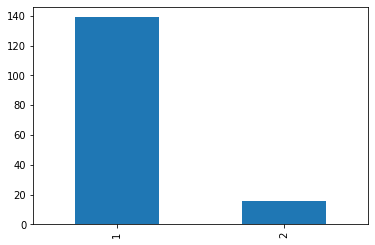

In [33]:
df['sex'].value_counts().plot(kind='bar')

#### Narative
+ There are more males than females in ourdataset

In [34]:
### Age Range
df.groupby(['age','sex']).size()

age  sex
7    1      1
20   1      2
     2      1
22   1      1
     2      1
23   1      4
24   1      2
25   1      2
     2      1
26   2      1
27   1      4
28   1      4
     2      1
30   1      7
     2      1
31   1      4
32   1      4
33   1      3
34   1      6
     2      2
35   1      2
36   1      7
37   1      5
38   1      8
39   1      6
40   1      3
41   1      2
     2      1
42   1      5
43   1      1
44   1      5
45   1      4
     2      1
46   1      1
47   1      4
48   1      2
49   1      3
50   1      5
     2      1
51   1      6
52   1      3
53   2      1
54   1      5
56   1      3
57   1      2
58   1      1
     2      1
59   1      1
60   1      1
61   1      3
62   1      1
     2      1
64   1      1
65   1      1
66   1      1
67   2      1
69   2      1
70   1      1
72   1      1
78   1      1
dtype: int64

#### Frequency Distribution Table using the Age Range

In [35]:
df['age'].max()

78

In [36]:
df['age'].min()

7

In [37]:
labels = ["Less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
bins= [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['age'],bins=bins,labels=labels)).size()

In [38]:
freq_df

age
Less than 10     1
10-20            3
20-30           29
30-40           50
40-50           35
50-60           24
60-70           11
70 and more      2
dtype: int64

In [39]:
freq_df = freq_df.reset_index(name='count')

In [40]:
freq_df

,age,count
0,Less than 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 and more,2


<AxesSubplot:>

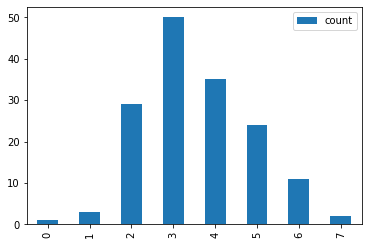

In [41]:
freq_df.plot(kind='bar')

<AxesSubplot:>

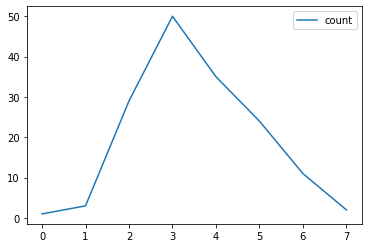

In [42]:
freq_df.plot(kind='line')

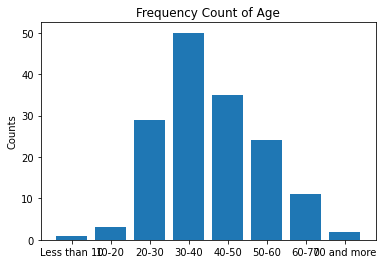

In [43]:
# Plot of Freq Table
plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency Count of Age')
plt.show()

#### Narative
+ Highest prevalence of Hepatitis is from 30-40 followed by 40-50
+ The least is individual under 10, and elderly above 70

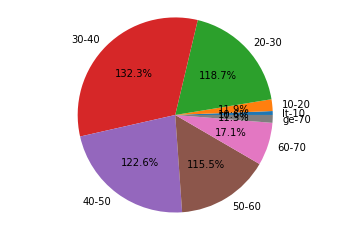

In [44]:
# Pie chart
labels = ['lt-10',"10-20","20-30","30-40","40-50","50-60","60-70","ge-70"]
fig1,ax1 = plt.subplots()
ax1.pie(freq_df['count'],labels=labels,autopct='1%.1f%%')
ax1.axis('equal')
plt.show()

#### Checking for Outliers
+ Univariate Analysis
+ Multivariate Analysis

#### Methods
+ Boxplot(Uni)
+ Scatterplot (Multi)
+ Z-score
+ IQR Interquartile Range

In [45]:
# Using Boxplot for Univariate Outlier Detection
import seaborn as sns

c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

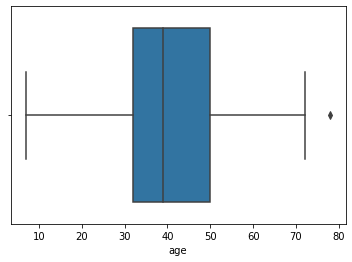

In [46]:
sns.boxplot(df['age'])

c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alk_phosphate'>

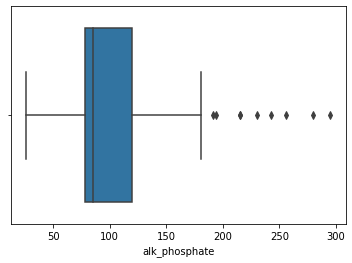

In [47]:
sns.boxplot(df['alk_phosphate'])

In [48]:
df[df['age'] == 78]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,35,1


c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='steroid'>

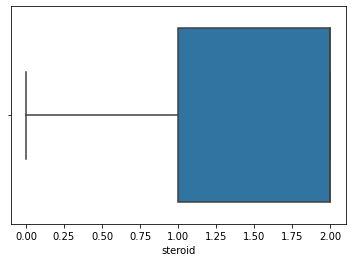

In [49]:
# using boxplot for outlier detection
sns.boxplot(df['steroid'])

c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='albumin'>

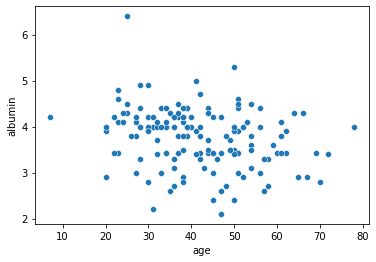

In [50]:
# Scatterplot
sns.scatterplot(df['age'],df['albumin'])

<AxesSubplot:xlabel='albumin', ylabel='age'>

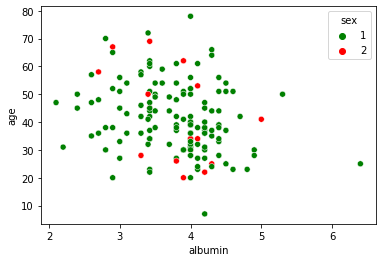

In [51]:
# Scatter plot
sns.scatterplot(x=df['albumin'],y=df['age'],hue=df['sex'], palette=['green','red'],data=df)

#### Using Interquartile Range(IQR)
+ H-Spread/Mid_spread
+ Measures the statistical dispersion/spread
+ IQR = Quantile 3(75) - Quantile 1(25)

In [52]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [53]:
IQR = q3 - q1

In [54]:
IQR

class               0.000000
age                18.000000
sex                 0.000000
steroid             1.000000
antivirals          0.000000
fatigue             1.000000
malaise             1.000000
anorexia            0.000000
liver_big           0.000000
liver_firm          1.000000
spleen_palpable     0.000000
spiders             1.000000
ascites             0.000000
varices             0.000000
bilirubin           0.700000
alk_phosphate      41.500000
sgot               66.500000
albumin             0.776774
protime            30.000000
histology           1.000000
dtype: float64

In [55]:
### Get the actual datapoint that is an outlier
(df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


#### Narative
+ The data points with true are the outlier


#### Solution
+ Remove
+ Change
+ Ignore

In [56]:
df_no_outlier = df[~((df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))).any(axis=1)]

In [57]:
df_no_outlier

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.900000,95,28,4.000000,75,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.000000,85,83,3.423226,35,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.700000,85,48,4.400000,35,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.000000,85,120,3.900000,35,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.200000,57,144,4.900000,78,1
16,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.200000,102,53,4.300000,35,1
17,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.600000,62,166,4.000000,63,1
18,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.700000,53,42,4.100000,85,2
22,2,31,1,2,2,2,2,2,2,2,2,2,2,2,1.000000,85,20,4.000000,100,1
23,2,42,1,2,2,2,2,2,2,2,2,2,2,2,0.900000,60,63,4.700000,47,1


In [58]:
print(df.shape)
print(df_no_outlier.shape)

(155, 20)
(45, 20)


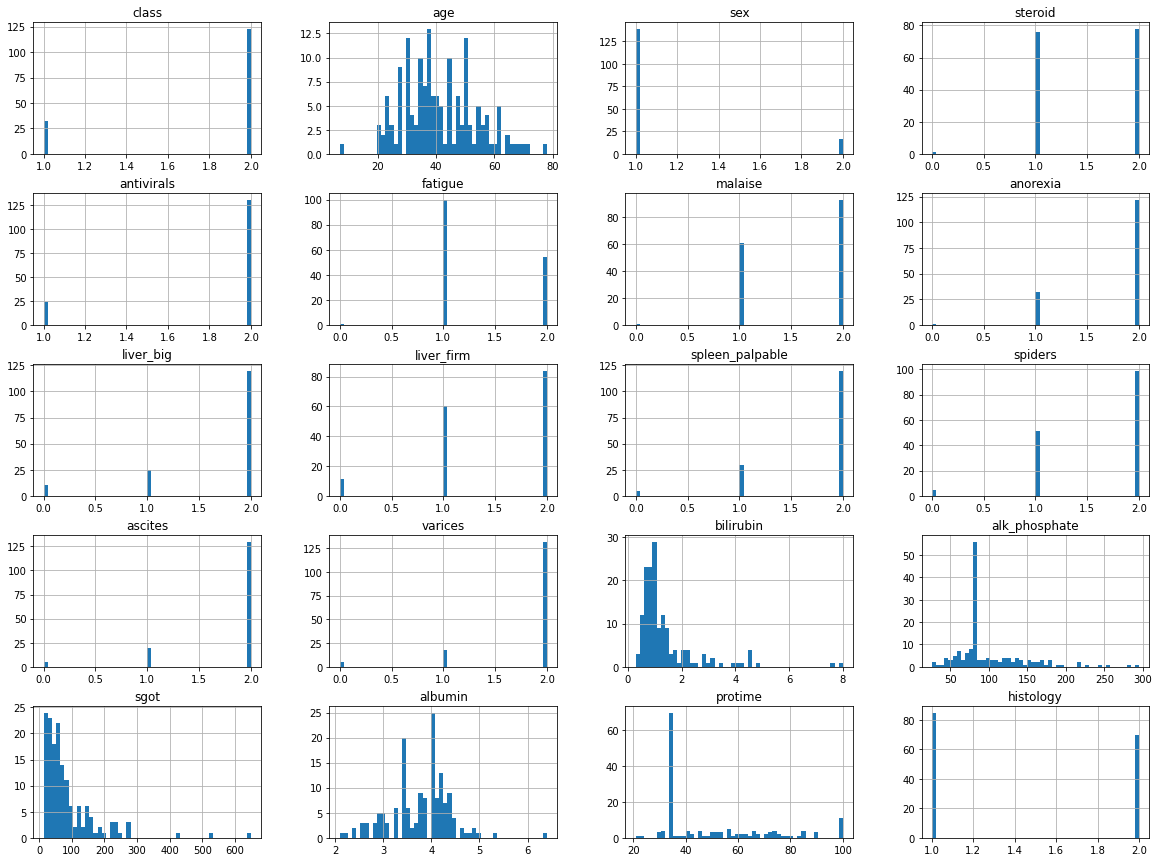

In [59]:
### Plot of distribution of data
df.hist(bins=50,figsize=(20,15))
plt.show()

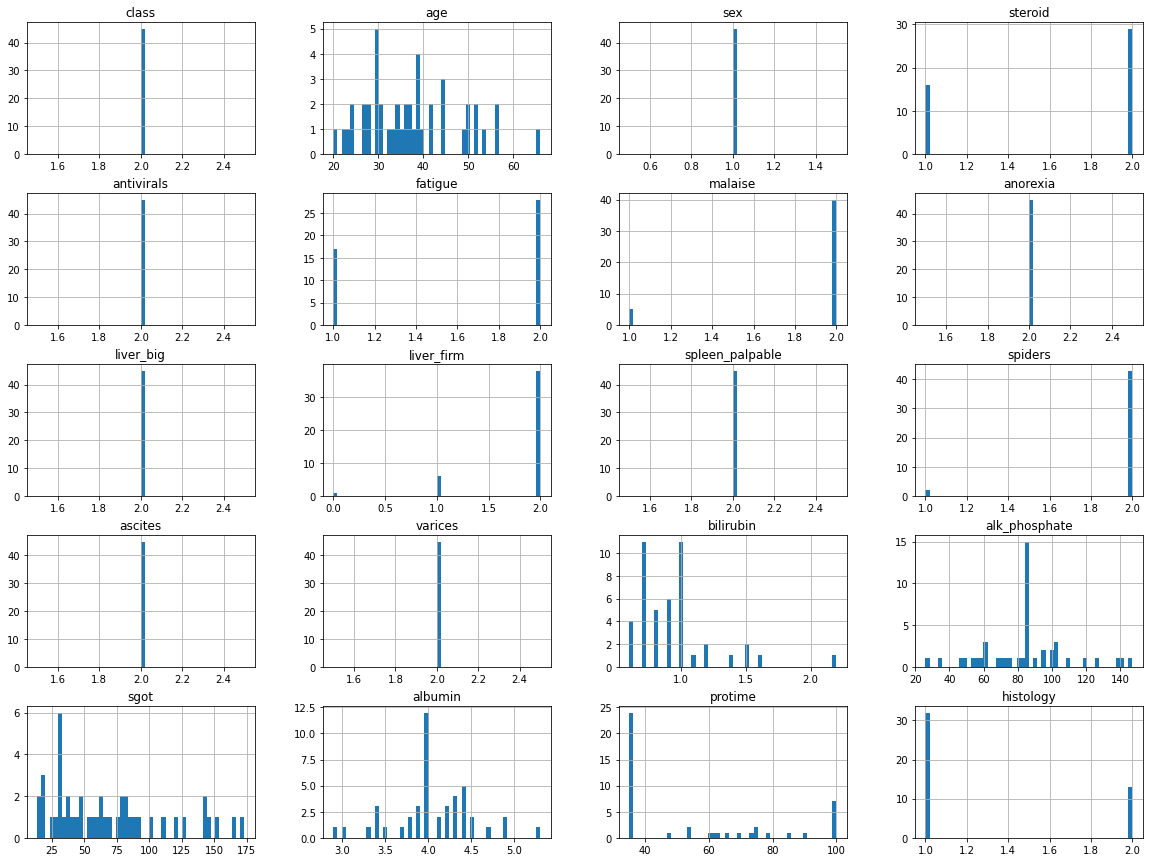

In [60]:
### Plot of distribution of data
df_no_outlier.hist(bins=50,figsize=(20,15))
plt.show()

### 3.Feature Selection and Importance
+ SelectKbest
    - Strong relation with the output/target
+ Recursive Feature Elimination

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection  import chi2

In [62]:
# Features and Labels
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,35,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,35,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,35,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,200,4.0,35,1


In [63]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [64]:
xfeatures = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
ylabels = df['class']

In [65]:
# using Skbest
skb = SelectKBest(score_func=chi2,k=10)
best_feature_fit = skb.fit(xfeatures,ylabels)

In [66]:
# Highest score shows the best fit
print("Scores",best_feature_fit.scores_)

Scores [28.47481919  0.38948319  0.3995129   0.18634161  2.34643234  2.46803203
  0.19648065  0.31698209  0.9867095   0.74535155  3.18940804  2.09639954
  1.12812176 30.88036987 52.60949611 78.9456725   3.62097397 91.29929183
  3.01854675]


In [67]:
# Transform(Optional)
bf_02 = best_feature_fit.transform(xfeatures)

In [68]:
bf_02

array([[30. ,  2. ,  2. , ...,  4. , 35. ,  1. ],
       [50. ,  1. ,  2. , ...,  3.5, 35. ,  1. ],
       [78. ,  1. ,  2. , ...,  4. , 35. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1, 35. ,  2. ],
       [53. ,  1. ,  2. , ...,  4.1, 48. ,  2. ],
       [43. ,  1. ,  2. , ...,  3.1, 42. ,  2. ]])

In [69]:
# Mapping to Feature Name
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])

In [70]:
feature_scores

,Feature_Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [71]:
feature_column_names = pd.DataFrame(xfeatures.columns,columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores,feature_column_names],axis=1)

In [72]:
best_feat_df

,Feature_Scores,Feature_name
0,28.474819,age
1,0.389483,sex
2,0.399513,steroid
3,0.186342,antivirals
4,2.346432,fatigue
5,2.468032,malaise
6,0.196481,anorexia
7,0.316982,liver_big
8,0.986710,liver_firm
9,0.745352,spleen_palpable


In [73]:
# Get the best
# The higher the number the more important the feature
best_feat_df.nlargest(10,'Feature_Scores')

,Feature_Scores,Feature_name
17,91.299292,protime
15,78.945673,sgot
14,52.609496,alk_phosphate
13,30.880370,bilirubin
0,28.474819,age
16,3.620974,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [74]:
best_feat_df.nlargest(12,'Feature_Scores')

,Feature_Scores,Feature_name
17,91.299292,protime
15,78.945673,sgot
14,52.609496,alk_phosphate
13,30.880370,bilirubin
0,28.474819,age
16,3.620974,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [75]:
best_feat_df.nlargest(12,'Feature_Scores')['Feature_name'].unique()

array(['protime', 'sgot', 'alk_phosphate', 'bilirubin', 'age', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices'],
      dtype=object)

#### Recursive Feature Elimination

In [76]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [77]:
logit = LogisticRegression()

In [78]:
rfe = RFE(logit,8)

c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [79]:
rfe_fit = rfe.fit(xfeatures,ylabels)

c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [80]:
# Selection
selected_features = pd.DataFrame(rfe_fit.support_,columns=['Selected_Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_,columns=['ranking_Features'])

In [81]:
rfe_feature_df = pd.concat([feature_column_names,selected_features,ranking_features],axis=1)

In [82]:
rfe_feature_df

,Feature_name,Selected_Features,ranking_Features
0,age,False,7
1,sex,True,1
2,steroid,False,2
3,antivirals,False,4
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver_big,False,8
8,liver_firm,False,9
9,spleen_palpable,False,6


#### Narative
+ RFE we will eliminate the lowest ranting or true

#### Checking for Feature Importance
+ ExtraTreeClassifier
+ Which feature is important

In [83]:
from sklearn.ensemble import ExtraTreesClassifier

In [84]:
# Init
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures,ylabels)

ExtraTreesClassifier()

In [85]:
# Print Important
print(et_clf.feature_importances_)


[0.05679325 0.02203268 0.02564259 0.01112729 0.02692699 0.0557637
 0.02812537 0.04209647 0.04904343 0.04085021 0.06840956 0.08034897
 0.04722452 0.10029864 0.07610129 0.0481753  0.08980593 0.06807197
 0.06316184]


In [86]:
feature_imporance_df = pd.Series(et_clf.feature_importances_,index=xfeatures.columns)

In [87]:
feature_imporance_df

age                0.056793
sex                0.022033
steroid            0.025643
antivirals         0.011127
fatigue            0.026927
malaise            0.055764
anorexia           0.028125
liver_big          0.042096
liver_firm         0.049043
spleen_palpable    0.040850
spiders            0.068410
ascites            0.080349
varices            0.047225
bilirubin          0.100299
alk_phosphate      0.076101
sgot               0.048175
albumin            0.089806
protime            0.068072
histology          0.063162
dtype: float64

<AxesSubplot:>

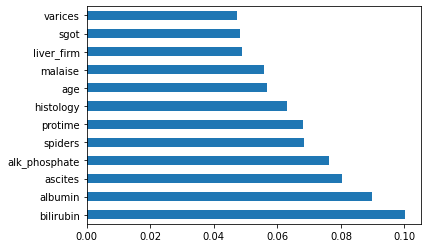

In [88]:
feature_imporance_df.nlargest(12).plot(kind='barh')

#### Narrative
+ All the methods gave us almost the same features to use

In [89]:
# Correlation
df.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.219647,0.173051,0.121140,-0.130196,0.292206,0.315970,0.110715,0.102151,0.154736,0.180894,0.330194,0.332796,0.249610,-0.449885,-0.125083,-0.074964,0.474229,0.255382,-0.337856
age,-0.219647,1.000000,0.008126,-0.067710,-0.013100,-0.264635,-0.099516,0.100589,-0.126358,-0.100979,-0.127258,-0.206551,-0.125020,-0.114412,0.121922,0.017954,0.080980,-0.258079,-0.101633,0.170780
sex,0.173051,0.008126,1.000000,-0.039222,-0.089249,-0.063947,-0.020895,0.025186,0.023634,0.015750,-0.078414,-0.065592,0.049516,-0.005045,-0.055603,0.099693,-0.017337,0.000711,0.040189,-0.137450
steroid,0.121140,-0.067710,-0.039222,1.000000,0.101657,0.146292,0.232041,0.084752,0.159877,0.095280,0.071401,0.029781,-0.002593,-0.029759,-0.034862,-0.019369,-0.032970,0.223368,0.058780,-0.070144
antivirals,-0.130196,-0.013100,-0.089249,0.101657,1.000000,-0.065578,-0.026703,-0.052554,-0.060626,-0.019871,-0.183070,-0.176367,-0.176382,-0.167721,0.181231,0.167796,0.107512,-0.178961,-0.205239,0.209242
fatigue,0.292206,-0.264635,-0.063947,0.146292,-0.065578,1.000000,0.617660,0.419991,0.168796,0.254621,0.226850,0.380935,0.288877,0.217311,-0.266574,-0.143653,-0.194579,0.311138,0.159241,-0.131177
malaise,0.315970,-0.099516,-0.020895,0.232041,-0.026703,0.617660,1.000000,0.631662,0.192556,0.197903,0.145236,0.376666,0.376182,0.267029,-0.285419,-0.179452,-0.195947,0.296596,0.144860,-0.116964
anorexia,0.110715,0.100589,0.025186,0.084752,-0.052554,0.419991,0.631662,1.000000,0.185164,0.144556,0.185004,0.371874,0.301514,0.288883,-0.279924,-0.106115,-0.220444,0.158138,0.102118,-0.049702
liver_big,0.102151,-0.126358,0.023634,0.159877,-0.060626,0.168796,0.192556,0.185164,1.000000,0.698517,0.338963,0.370229,0.339108,0.238645,-0.071693,-0.047376,-0.056380,0.017097,0.136353,-0.104757
liver_firm,0.154736,-0.100979,0.015750,0.095280,-0.019871,0.254621,0.197903,0.144556,0.698517,1.000000,0.322955,0.407114,0.310338,0.295100,-0.093019,-0.230850,-0.169941,0.151445,0.102738,-0.206632


<AxesSubplot:>

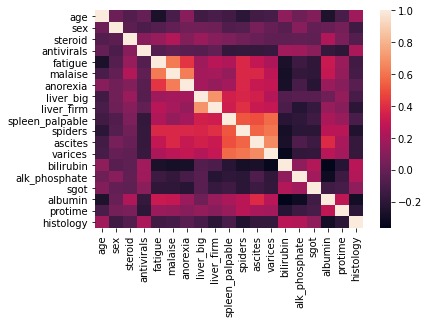

In [90]:
# Heatmap for Correlation
sns.heatmap(xfeatures.corr())

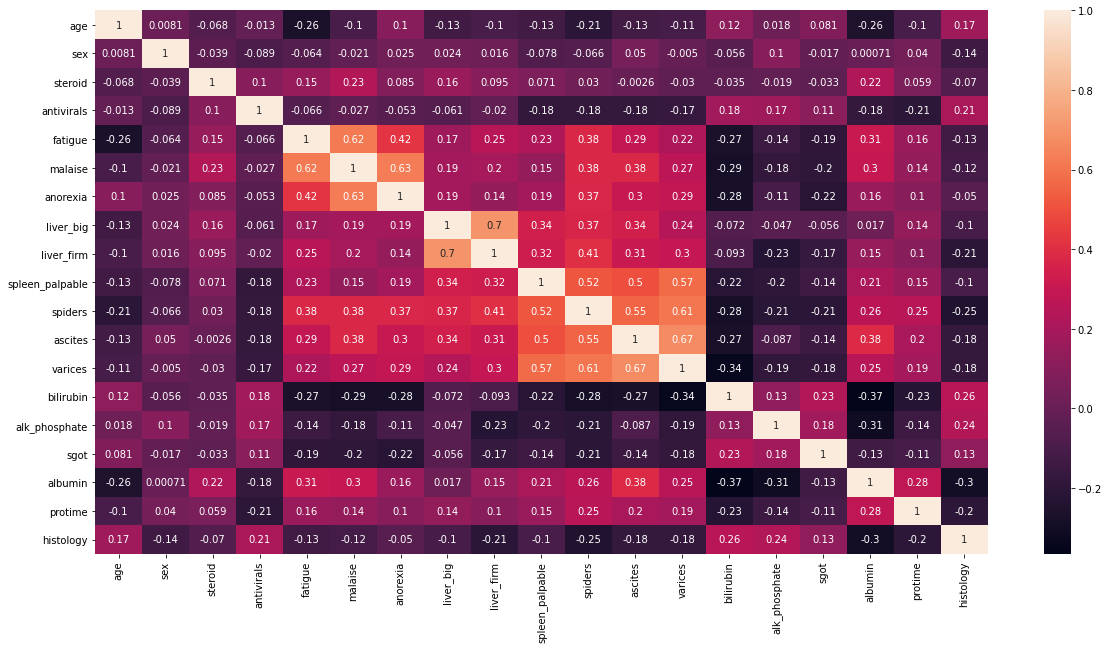

In [91]:
# Heatmap for Correlation with Annot
plt.figure(figsize=(20,10))
sns.heatmap(xfeatures.corr(),annot=True)
plt.show()

### 4.Model Building
+ Feature & Labels
+ Train/Test/Split
+ LogisticRegression
+ RF
+ DCT
+ Serialize

In [92]:
# ML Pkg
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [93]:
# Features for Initial Data
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [94]:
xfeatures

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,35,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,35,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,35,1
3,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,200,4.0,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,85,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,35,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,35,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [95]:
ylabels = df['class']

In [96]:
# Selected Features
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [97]:
xfeatures_best = df[['age', 'sex', 'steroid', 'antivirals','fatigue','spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]

In [98]:
# train /test dataset
x_train,x_test,y_train,y_test = train_test_split(xfeatures,ylabels,test_size=0.30,random_state=7)

In [99]:
# train /test dataset for best features
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(xfeatures_best,ylabels,test_size=0.30,random_state=10)

In [100]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train_b = scaler.fit_transform(x_train_b)

In [101]:
# Building Model
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
# Model Accuracy
# Method 1
logreg.score(x_test,y_test)

0.723404255319149

In [103]:
# Method 2 
logreg.predict(x_test)

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int64)

In [104]:
print(list(y_test))

[2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2]


In [105]:
accuracy_score(y_test,logreg.predict(x_test))

0.723404255319149

In [106]:
# Building Model
model_logit = LogisticRegression()
model_logit.fit(x_train_b,y_train_b)

c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
# Model Accuracy
# Method 1
model_logit.score(x_test_b,y_test_b)

0.851063829787234

In [108]:
### Single Prediction
x_test.iloc[1]

age                 58.0
sex                  1.0
steroid              2.0
antivirals           2.0
fatigue              1.0
malaise              2.0
anorexia             2.0
liver_big            1.0
liver_firm           1.0
spleen_palpable      1.0
spiders              1.0
ascites              2.0
varices              2.0
bilirubin            2.0
alk_phosphate      167.0
sgot               242.0
albumin              3.3
protime             35.0
histology            1.0
Name: 76, dtype: float64

In [109]:
res_dic = {"Die":1,"Live":2}
x1 = x_test.iloc[1]

In [110]:
# Reshaping 
logreg.predict(np.array(x1).reshape(1,-1))

array([2], dtype=int64)

#### Alternative Algorithms


In [111]:
clf = DecisionTreeClassifier()

In [112]:
# Fit
clf.fit(x_train_b,y_train_b)

DecisionTreeClassifier()

In [113]:
# Model Accuracy Score
clf.score(x_test_b,y_test_b)

0.7872340425531915

In [114]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [115]:
knn = KNeighborsClassifier(n_neighbors=3)

In [116]:
# Fit
knn.fit(x_train_b,y_train_b)

KNeighborsClassifier(n_neighbors=3)

In [117]:
# Model Accuracy Score
knn.score(x_test_b,y_test_b)

0.7446808510638298

In [118]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train_b,y_train_b)
# print("Accuracy on training set: {:.3f}".format(rf.score(x_test_b,y_test_b)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test_b,y_test_b)))

Accuracy on test set: 0.894


In [119]:
Y_pred_rf=rf.predict(x_test_b)

In [120]:
Y_pred_rf

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int64)

In [121]:
x_test_b.head()

,age,sex,steroid,antivirals,fatigue,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
81,36,1,2,2,2,2,2,2,0.7,62,224,4.200000,100,1
10,39,1,1,1,2,2,2,2,1.3,78,30,4.400000,85,1
90,50,2,1,2,1,1,2,2,0.9,230,117,3.400000,41,2
67,57,1,2,2,1,1,1,2,4.1,85,48,2.600000,73,1
55,37,1,1,2,1,2,2,2,0.8,92,59,3.423226,35,1


In [122]:
import os
import joblib
model_path=os.path.join('models/rf_hepatitis.sav')
joblib.dump(rf,model_path)

['C:/Users/my pc/Desktop/Stroke-Risk-Prediction-imp/models/rf_hepatitis.sav']

In [123]:
xfeatures_best.corrwith(ylabels)

age             -0.219647
sex              0.173051
steroid          0.121140
antivirals      -0.130196
fatigue          0.292206
spiders          0.330194
ascites          0.332796
varices          0.249610
bilirubin       -0.449885
alk_phosphate   -0.125083
sgot            -0.074964
albumin          0.474229
protime          0.255382
histology       -0.337856
dtype: float64

In [124]:
x_test_b.head()

,age,sex,steroid,antivirals,fatigue,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
81,36,1,2,2,2,2,2,2,0.7,62,224,4.200000,100,1
10,39,1,1,1,2,2,2,2,1.3,78,30,4.400000,85,1
90,50,2,1,2,1,1,2,2,0.9,230,117,3.400000,41,2
67,57,1,2,2,1,1,1,2,4.1,85,48,2.600000,73,1
55,37,1,1,2,1,2,2,2,0.8,92,59,3.423226,35,1


In [125]:
y_test_b


81     2
10     2
90     2
67     1
55     2
119    2
98     1
136    2
60     2
43     2
35     1
96     2
85     2
147    1
19     2
58     2
1      2
63     2
91     1
39     2
24     2
127    1
21     2
38     2
79     2
130    2
95     2
83     2
118    1
128    2
66     2
2      2
109    1
104    1
70     2
137    2
121    2
69     2
72     2
124    2
47     2
153    2
78     2
26     2
52     2
151    2
41     2
Name: class, dtype: int64

In [126]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(x_train_b,y_train_b)

# print("Accuracy on training set: {:.3f}".format(gb.score(x_test_b,y_test_b)))
print("Accuracy on test set: {:.3f}".format(gb.score(x_test_b,y_test_b)))

Accuracy on test set: 0.851


In [127]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train_b,y_train_b)

# print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test_b,y_test_b)))

Accuracy on test set: 0.81


In [128]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train_b,y_train_b)
Y_pred_sgd=sgd.predict(x_test_b)
ac_sgd=accuracy_score(y_test_b,Y_pred_sgd)
ac_sgd

0.8085106382978723

<AxesSubplot:>

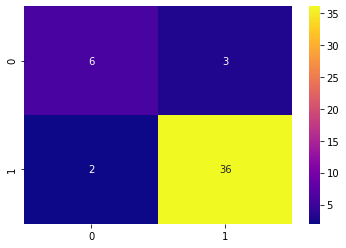

In [129]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_b, Y_pred_rf)
sns.heatmap(cm, cmap="plasma" , annot=True)

In [144]:
xfeatures_best.corrwith(ylabels)

age             -0.219647
sex              0.173051
steroid          0.121140
antivirals      -0.130196
fatigue          0.292206
spiders          0.330194
ascites          0.332796
varices          0.249610
bilirubin       -0.449885
alk_phosphate   -0.125083
sgot            -0.074964
albumin          0.474229
protime          0.255382
histology       -0.337856
dtype: float64

#### Save Our Model
+ Serialization
+ Pickle
+ Joblib
+ numpy/json/ray

In [130]:
# Using Joblib
# import joblib

In [131]:
# model_file = open("logistic_regression_hepB_model.pkl","wb")
# joblib.dump(model_logit,model_file)
# model_file.close()

In [132]:
# model_file_knn = open("knn_hepB_model.pkl","wb")
# joblib.dump(knn,model_file_knn)
# model_file_knn.close()

In [133]:
# model_file_clf = open("decision_tree_clf_hepB_model.pkl","wb")
# joblib.dump(clf,model_file_clf)
# model_file_clf.close()

In [134]:
# # Create Decision Tree Plot
# from IPython.display import Image
# from sklearn import tree
# import pydotplus

In [135]:
# feature_names_best = xfeatures_best.columns

In [136]:
# target_names = ["Die","Live"]

In [137]:
# Create A Dot Plot
# dot_data = tree.export_graphviz(clf,out_file=None,feature_names=feature_names_best,class_names=target_names)

In [138]:
# Draw a graph
# graph = pydotplus.graph_from_dot_data(dot_data)

In [139]:
# import graphviz
# Image(graph.create_png())

In [140]:
# Save the plot
# graph.write_png("hep_decisition_tree_plot.png")

### 5.Interpret Model & Evaluate
+ Eli5
+ Lime
+ SHAP
+ Skater


In [141]:
# Intepreting with Lime
# import lime
# import lime.lime_tabular

In [142]:
# Methods and Attributes
# dir(lime)

#### Create Lime Explainer
+ LimeTabularExplainer = Tables
+ LimeTextExplainer = Text
+ LimeImageExplainer = Images

In [143]:
feature_names_best

NameError: name 'feature_names_best' is not defined

In [ ]:
# target_names

In [ ]:
# class_names = ["Die(1)","Live(2)"]

In [ ]:
# # Create Explainer
# explainer = lime.lime_tabular.LimeTabularExplainer(x_train_b.values,
#                                                    feature_names=feature_names_best,
#                                                    class_names=class_names,
#                                                    discretize_continuous=True)

In [ ]:
# x1

In [ ]:
# x_test_b.iloc[1]

In [ ]:
# model_logit.predict(np.array(x_test_b.iloc[1]).reshape(1,-1))

In [ ]:
# exp = explainer.explain_instance(x_test_b.iloc[1],model_logit.predict_proba,num_features=14,top_labels=1)

In [ ]:
# exp.show_in_notebook(show_table=True,show_all=False)

In [ ]:
# Explanation as list
# exp.as_list()

In [ ]:
### Using Eli5
# import warnings
# warnings.filterwarnings('ignore')
# import eli5

In [ ]:
# Show how each feature contributes
# eli5.show_weights(model_logit,top=10)

In [ ]:
# feature_names_best = ['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
#        'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
#        'histology']

In [ ]:
# Show how each feature contributes
# eli5.show_weights(model_logit,feature_names=feature_names_best,target_names=class_names)

In [ ]:
# Show how each feature contributes
# eli5.show_prediction(model_logit,x_test_b.iloc[1],feature_names=feature_names_best,target_names=class_names)

### 6.Evaluation of Model
+ Confuion Matrix
+ Classification Report
+ Accuracy core

In [ ]:
# from sklearn.metrics import confusion_matrix

In [ ]:
# y_pred = model_logit.predict(x_test_b)

In [ ]:
# # Accuracy Score
# accuracy_score(y_test,y_pred)

In [ ]:
# # Using Confusion Matrix
# confusion_matrix(y_test,y_pred)

In [ ]:
# # Plot
# from sklearn.metrics import plot_confusion_matrix

In [ ]:
# plot_confusion_matrix(model_logit,x_test_b,y_test_b)

In [ ]:
# tp,tf,fn,tn = confusion_matrix(y_test,y_pred).ravel()

In [ ]:
# tp

In [ ]:
# ## Classification report
# from sklearn.metrics import classification_report

In [ ]:
# print(classification_report(y_test,y_pred))

In [ ]:
# class_names

In [ ]:
# print(classification_report(y_test,y_pred,target_names=class_names))